# Erkennen Deutscher Verkehrszeichen

Autor: Alexa Hoock

Matrk.-Nr.: 400123972

Stand: 07. Februar 2022

# Arbeitsaket 1: Datenaufbereitung

**Problem Statement:** Verkehrszeichen bestimmen seit Beginn der menschlichen Mobilität einen wesentlichen Bestandteil unserer Straßen Infrastruktur. Sie geben uns wichtige Informationen und zwingen uns unser Fahrverhalten anzupassen. Dies stellt sicher, dass wir uns an die Straßenvorschriften halten und sicher miteinander umgehen können. International ähneln sich die Schilder, und stellen eine Art universelle Sprache dar. In Deutschland gab es im Jahr 2019 insgesamt 3.046 Verkehrs Tote. Eine beachtliche Zahl, welche ohne Verkehrsschilder noch höher wäre. Mit uns evolutioniert sich auch die Technologie, sodass auch immer mehr autonome Fahrzeuge die Straßen unsicher machen. Autonomes Fahren ist ein wichtiger Teil unseres zukünftigen Individualverkehrs und wird diesen maßgeblich prägen. Natürlichen müssen auch sie sich an die Straßenregeln halten und dafür Verkehrsschilder treffsicher und gezielt erkennen sowie verstehen können. Die Grundhaltung der Bevölkerung ist zu dieser neuen Technologie durchaus positiv und wird auch heute schon häufig genutzt.Traditionell wurden Standard-Computer-Vision-Methoden verwendet, um Straßenschilder zu erkennen, aber diese erforderten erhebliche und zeitaufwändige manuelle Arbeit. Um diese Herausforderung zu lösen, wird ein Deep-Learning-Algorithmus entwickelt. In diesem Jupyter Notebook zeige ich, wie ich eine Deep-Learning-Architektur erstellen kann, die die Erkennung von Verkehrszeichen mit einer hoher Genauigkeit ermöglicht.

Quellen, welche ich übergreifend an mehreren Stellen für diese Arbeit verwende:


*   [Malaria Beispiel aus der Vorlesung](https://colab.research.google.com/drive/1xDi8AoSY59nDYFwlsUoCli5YQhKu7ECN)
*   [Towards Data Science: Recognising Traffic Signs With 98% Accuracy Using Deep Learning, by Eddie Forson](https:///towardsdatascience.com/recognizing-traffic-signs-with-over-98-accuracy-using-deep-learning-86737aedc2ab)
*   [Data Solut: Trainings-, Validierungs- und Testdatensatz by Laurenz Wuttke](https://datasolut.com/wiki/trainingsdaten-und-testdaten-machine-learning/) 
*   [Keras-Dokumentation](https://www.tensorflow.org/guide/keras/sequential_model://)

Weitere punktuell verwendeten Quellen sind an den jeweiligen Stellen eingefügt.

Als erstes importiere ich einige Standardbibliotheken, welche ich für die weitere Bearbeitung gebrauchen werde:

In [ ]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# wir lesen die Daten aus einem Github-Verzeichnis ein
# ein GitHub ist ein webbasierter Filehosting-Service für die Softwareentwicklung und das Teilen von Softwarecode
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), done.


In [ ]:
# die Daten, welche ich heruntergeladen habe möchte ich mir im Folgenden auch ansehen
# dafür nutze ich den Befehl ls, welcher weit verbreitet ist und mir den Verzeichnis Inhalt auflistet
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [ ]:
# Quelle folgende Ausführungen: https://datasolut.com/wiki/trainingsdaten-und-testdaten-machine-learning/ 

Das vorliegende Datenset enthält einen Test sowie einen Trainings Ordner, der entsprechende Bilder enthält. Für das Machine Learning ist es erforderlich die Daten im nächsten Schritt in eine Trainings-, Test- und Validierungsmenge einzuteilen. Da unser Beispiel eines des überwachten, also Supervised Learning, ist, werden Beispieldaten benötigt, um trainiert werden und zu einem besseren Ergebnis führen zu können. Beispieldaten sind Daten, bei denen die Zielvariable vorgegeben ist. Vor dem spezifischen Code definiere ich zuerst die hier erforderlichen Begrifflichkeiten: 

(Quelle der in den folgenden Absätzen dargelegten Theorie: Datasolut - Link oben angegeben)

**1. Trainingsdaten:**
Trainingsdaten beschreiben Datensätze mit Beispielen, auch Zielvariablen genannt, die für das Lernen der Muster und Zusammenhänge in den Daten verwendet werden. Es lässt sich feststellen, dass die Anpassung der Gewichte des Algorithmus über den Trainingsdatensatz antrainiert wird. Dies bedeutet, dass der Algorithmus aus diesen Daten lernen kann. Zusammenfassend werden Trainingsdaten für Klassifikations- und Regressionsprobleme benötigt. Oft tendieren Algorithmen zu einem Overfitting. Dies bedeutet, dass Zusammenhänge und Beziehungen aus den Trainingsdaten von dem Algorithmus zu stark antrainiert werden.

**2. Testdaten:** Die Testdaten sind von den Trainingsdaten unabhängig und 
repräsentieren einen anderen Anteil an der Gesamtmenge, sollten jedoch die gleiche Wahrscheinlichkeitsverteilung wie der Trainingsdatensatz aufweisen.
Die Testdaten werden bei dem Training nicht genutzt d.h. der Algorithmus kennt die Daten nicht und kann diese nicht zum Lernen nutzen. Auch hier sind Beispiele bzw. Zielvariablen vorhanden, woran im Anschluss die Qualität des Modells gemessen werden kann.
Wenn das trainierte Modell gut zu den Testdaten passt, d.h. die Beispieldaten mit einer guten Qualität vorhersagt, kann das Modell auf unbekannte (noch zu bewertende) Daten angewandt werden.

**3. Validierungsdaten:** Ein Validierungsdatensatz ist ebenfalls ein Beispieldatensatz. Die Validierungsdaten werden für die Abstimmung der Hyperparameter (d.h. für künstliche Neuronale Netzwerke der Architektur) eines Modells verwendet.
So wird vor allem eine Überanpassung des Modells auf die Trainingsdaten vermieden.




In [ ]:
# Die Codes bis Data Augmentation sind aus der "Hilfestellung" E-Mail von Dr. Jens Kohl entnommen

In [ ]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data=pkl.load(f)
with open('german-traffic-signs/test.p','rb') as f:
  test_data=pkl.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
  val_data=pkl.load(f)

Mit folgender Funktion können die Daten nun in zwei Sets gesplitted werden:

In [ ]:
X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
X_val, y_val = val_data['features'], val_data['labels']

Folglich wende ich den Befehl Print an, um die Form/Aufteilung des Datensets besser verstehen zu können

In [ ]:
print("Struktur der Features für Trainings-, Test- und Validierungsmenge")
print("Features Trainingsmenge:", X_train.shape)
print("Features Testmenge:", X_test.shape)
print("Features Validierungsmenge:", X_val.shape)

Struktur der Features für Trainings-, Test- und Validierungsmenge
Features Trainingsmenge: (34799, 32, 32, 3)
Features Testmenge: (12630, 32, 32, 3)
Features Validierungsmenge: (4410, 32, 32, 3)


Der Output zeigt mir die folgende Aufteilung des Datasets:

Die Trainingsmenge aus dem Trainngsordner besteht aus einer Gesamtheit von 34.799 Bildern. In dem Testordner befinden sich hingenend nur 12.630 Bilder und in der Validierungsmenge eine Anzahl von 4.410. Fraglich sind noch die Bedeutung der Zahlen 32 und 3. Diese werden als Input-Shape bezeichnet, da Bilder normal aus drei Farbkanälen bestehen. Außerdem gibt es eine CVS Datei der Schilder Namen, welche weitere Informationen über die Bilder dieser enthält. Quelle: Towards Data Science - Link oben angegeben

/

Bei dem Teilen der Bildermenge in eine Trainings- und Testmenge, ist die Zielvariable die ClassID des Schildes (wie zuvor erklärt). Alle Bilder sind auf insgesamt 43 Zielklassen verteilt. Quelle: Medium - Link oben angegeben

In [ ]:
# mit der Panda Read Funktion: read_csv() importiere ich eine CSV Datei in die Form eines Dataframes. Quelle: Towards Data Science - Link oben angegeben
# die Zeilen werden in der folgenden Tabelle angezeig, wobei dei Class ID mir den Pfad beschreibt und mir eine Identität eines Objekts zurück gibt
traffic_sign_classes_csv = pd.read_csv("german-traffic-signs/signnames.csv")
traffic_sign_classes_csv

ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                               Stop
15       15                                        No vechiles
16       16           Vechiles over 3.5 metric tons prohibited
17       17                                           No entry
18       18                                    General caution
19       19                        Dangerous curve to the left
20       20                       Dangerous curve to the right
21       21                                       Double curve
22       22                                         Bumpy road
23       23                                      Slippery road
24       24                          Road narrows on the right
25       25                                          Road work
26       26                                    Traffic signals
27       27                                        Pedestrians
28       28                                  Children crossing
29       29                                  Bicycles crossing
30       30                                 Beware of ice/snow
31       31                              Wild animals crossing
32       32                End of all speed and passing limits
33       33                                   Turn right ahead
34       34                                    Turn left ahead
35       35                                         Ahead only
36       36                               Go straight or right
37       37                                Go straight or left
38       38                                         Keep right
39       39                                          Keep left
40       40                               Roundabout mandatory
41       41                                  End of no passing
42       42  End of no passing by vechiles over 3.5 metric ...

Bevor ich mit der etwas aufwendigeren Data Augmentation, also der Datenerweiterung bei der künstlichen Datenanalyse beginne, lasse ich mir  aus den Verzeichnissen erstmal 8 zufällig ausgewählte Bilder je Zielklasse für jede der 43 Zielklassen anzeigen. Die Struktur der Bilder ist gegensätzlich des von uns in der Vorlesung behandelten Malaria Beispiels nicht relevant, da wir nicht nach auffälligen Strukturen suchen. Der Code (Quelle zu Malaria oben angegeben) muss dahingehend leicht angepasst werden. Die benötigte Matplot Line und Numpy wurde bereits im ersten Schritt bei der Standardbibliothek importiert.

In [ ]:
# Quelle nachfolgender Code: https://colab.research.google.com/github/CleanPegasus/Traffic-Sign-Classifier/blob/master/Traffic_Sign_Classifier.ipynb

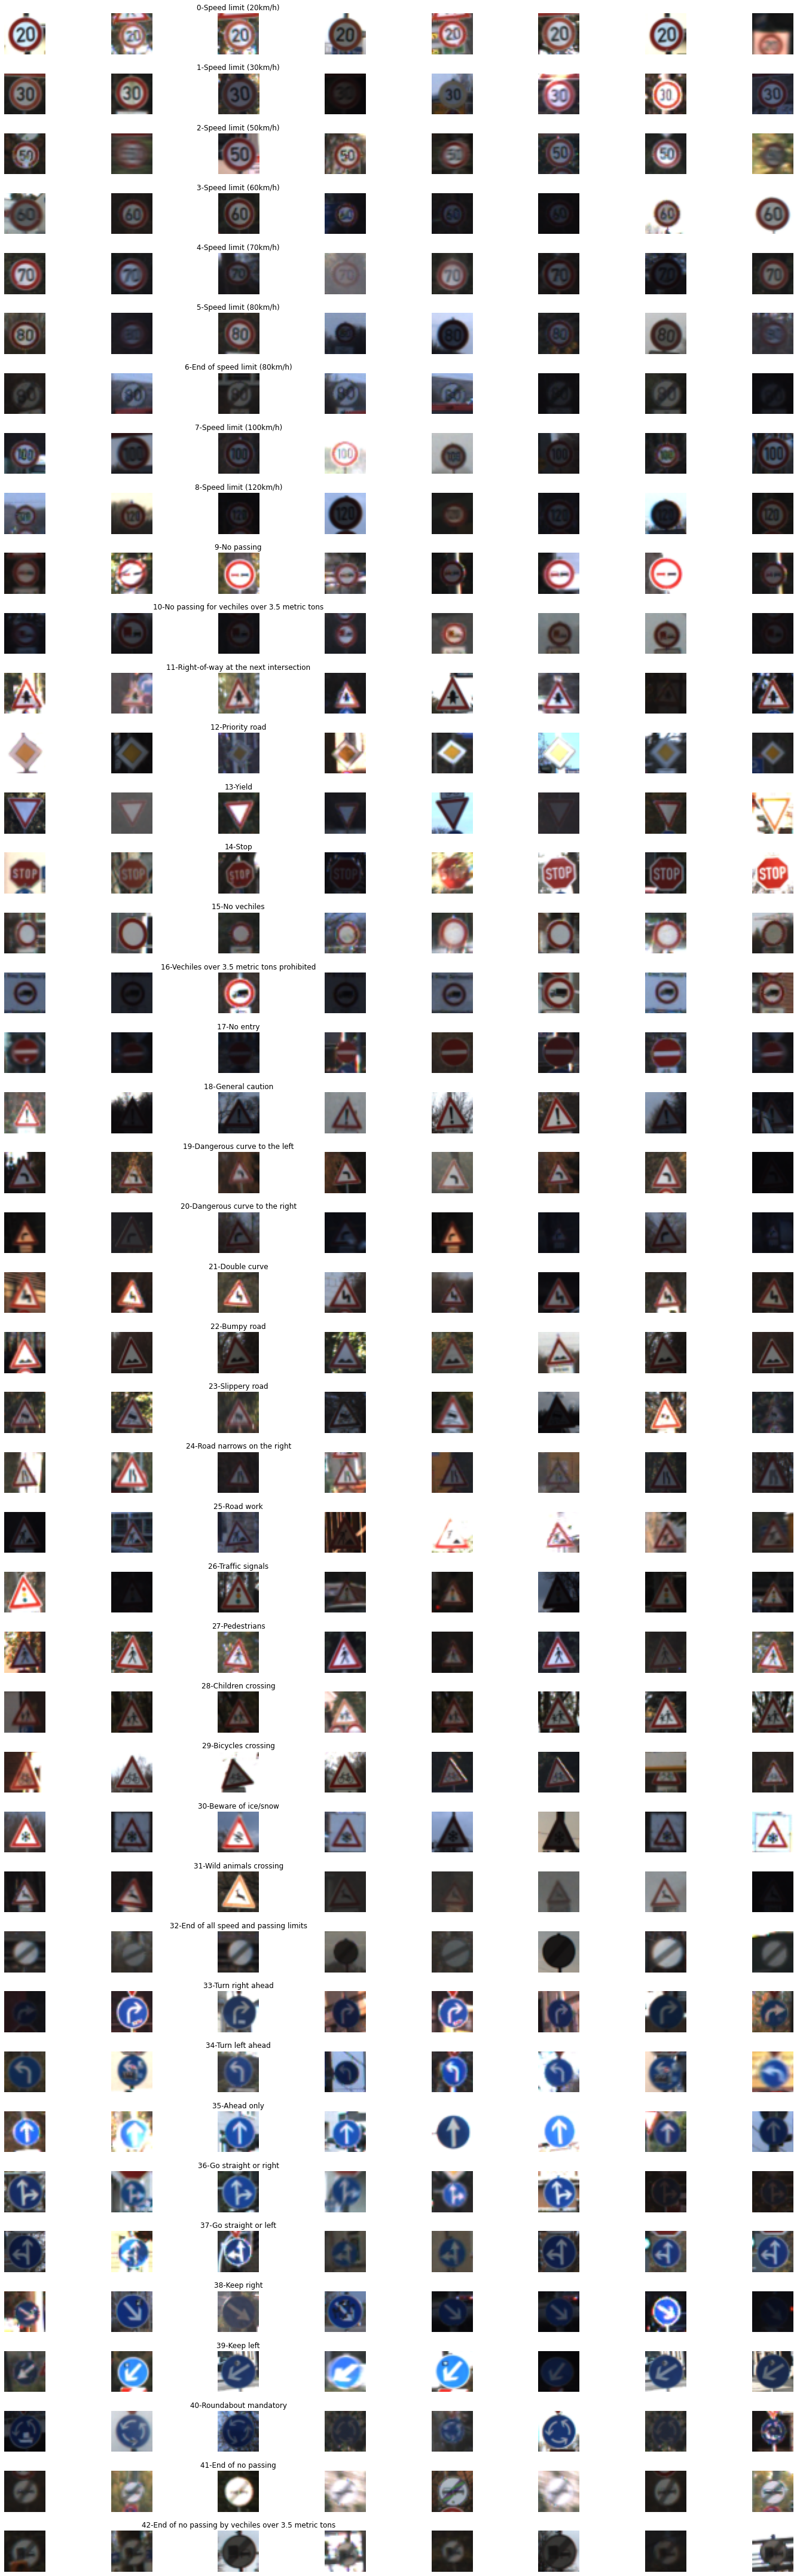

In [ ]:
columns = 8
fig, axs = plt.subplots(nrows = len(traffic_sign_classes_csv.index), # Anzahl der Zeilen = jede Zeile ein spezifisches Schild
                        ncols = columns, 
                        figsize = (20, 60)) # Größe der Bilder

num_of_sample = []

fig.tight_layout()

# wir drucken jeweils 8 Bilder je Zeile
for i in range(columns):
    for j, raw in traffic_sign_classes_csv.iterrows():
        X_selected = X_train[y_train == j] # Der Befehl beschafft alle Bilder der aktuellen Klasse 
        
        # Von den ausgewählten Bildern soll eins ausgewählt werden
        axs[j][i].imshow(X_selected[np.random.randint(0, len(X_selected) - 1), :, :], cmap = plt.get_cmap('gray'))
        axs[j][i].axis("off") # Achsen des Bildes entfernen
        
        if i == 2:
            axs[j][i].set_title(str(j) + '-' + raw['SignName'])
            num_of_sample.append(len(X_selected)) # Bildbeschreibung (Titel) immmer oberhalb des ersten Bildes in der jeweiligen Zeile.

In [ ]:
# Verteilung der Bilder des Training Datasets innerhalb der Klassen

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

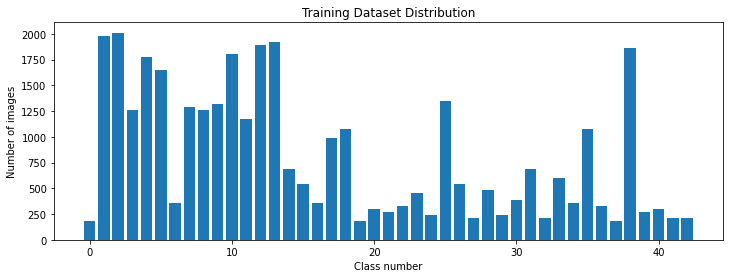

In [ ]:
print(num_of_sample)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_sample)
plt.title("Training Dataset Distribution")
plt.xlabel("Class number")
plt.ylabel("Number of images")

**Image Augmentation**

Die Normierung durch das Teilen der Bilder durch 255 erfolgt und ist später wichtig, da dadurch die Genauigkeit des Modells erhöht und Overfitting verringert werden kann. Normalisiert wird zwischen 0 und 1. Quelle: [Malaria Beispiel aus der Vorlesung](https://colab.research.google.com/drive/1xDi8AoSY59nDYFwlsUoCli5YQhKu7ECN) 

Um die Robustheit des Modells zu stärken und für alle möglichen Lebenssituationen vorzubereiten, ist wie zuvor erwähnt der Schritt der Image Augmentation grundlegend. Vor allem verhindert es bei schon geringfügigen Abweichungen eine Überanpassung (Overfitting) des Modells. Es gibt kein Aussetzen der Straßenverkehrsregeln bei schlechten Witterungsverhältnissen oder Dunkelheit. Eine bessere Erkennung und damit auch Robustheit wird durch eine künstliche Bildvergrößerung des Datensatzes herbeigeführt. Es werden modifizierte Versionen von Bildern erstellt. Ich nehme hier logischerweise den Trainingsdatensatz. Quelle Theorie: [Multiklassenklassifizierung mit Bildvergrößerung](https://ichi.pro/de/multiklassenklassifizierung-mit-bildvergrosserung-144362811042363)

Für das hier vorliegende Beispiel halte ich die folgenden Parameter für sinnvoll. Die folgenden Maßnahmen wurden hier entnommen und fallspezifisch ausgewählt sowie angepasst. Quelle zu Code Ideen und Inhalten: [Erkundung der Bilddatenerweiterung mit Keras und Tensorflow](https://ichi.pro/de/erkundung-der-bilddatenerweiterung-mit-keras-und-tensorflow-184813206747204) und [f.keras.preprocessing.image.ImageDataGeneratort](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

Es ist eher unpraktisch die erweiterten Daten im Speicher zu "lagern", daher kommt hier die Image Data Generator Klasse von Keras zum Einsatz. Der Generator erzeugt Stapel von Tensor Bilddaten mit Echtzeit-Datenerweiterung. Dabei ist nur eine Codezeile erforderlich, was den Prozess maßgeblich erleichtert:

In [ ]:
# der nachfolgede Code orientiert sich von der Grundstruktur an dem Malaria Beispiel aus Vorlesung 7. Quelle oben angegeben.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( # Erzeugt Stapel von Tensor Bilddaten mit Echtzeit-Datenerweiterung
    height_shift_range=[0.1], # Verschieben des Bildes nach oben oder unten
    width_shift_range=0.1, # Verschieben des Bildes nach rechts und links
    brightness_range=(0.1, 0.8),
    zoom_range=0.5, # Heranzoomen des Bildes
    channel_shift_range=130.0, # Kanalwerte zufällig um einen zufälligen Wert verschieben
    horizontal_flip=False, # Als False kategorisieren, da die Bedeutung der Schilder verfälscht wird (horizontal spiegeln)
    vertical_flip=False, # analog horizontal flip (vertikal spiegeln)
    rescale=1./255, # Normalisierung per rescale für manuelle Anpassung
    rotation_range=10, # Drehen des Bildes
    shear_range=0.08) # Verzerren der Proportionen


train_datagen.fit(X_train) # erklären
# 3. Durchlauf -->  97% Val. Accuracy 66% Train. Accuracy mit Dropout 0,6, Batch Size 256, 30 Epochen und 5 Layer (inkl. veränderter Netzstruktur)

In [ ]:
# height_shift_range=[0.1],
# width_shift_range=0.1,
# brightness_range=(0.1, 0.8),
# zoom_range=0.4,
# channel_shift_range=130.0,
# horizontal_flip=False, 
# vertical_flip=False, 
# rescale=1./255, 
# rotation_range=15,
# shear_range=0.4) 
# 2. Durchlauf --> 31% Val. Accuracy & 28% Train. Accuracy mit Dropout 0,3, Batch Size 128, 5 Epochen und 1 Layer



# height_shift_range=[-0,3,1,3],
# width_shift_range=0.8,
# brightness_range=(0.2, 0.9),
# zoom_range=0.6,
# channel_shift_range=130.0,
# horizontal_flip=False, Kommt als ander Bedeutung raus
# vertical_flip=False, Bedeutung Vorfahrt z. B. verfälscht
# rescale=1./255, 
# rotation_range=35,
# shear_range=0.6) Darf nicht zu sehr sein, weil z. B. Auto bremst, wenn Schild am Boden liegt
# 1. Durchlauf --> 17% Val. Accuracy & 14% Train. Accuracy mit Dropout 0,3, Batch Size 128, 5 Epochen und 1 Layer

Anpassungen der Image Augmentation konnten das Ergebnis um 14% verbessern. Die Parameter habe ich teilweise verringert, aber nicht zu viel, da zu viel Image Augmentation zu Overfitting führen kann.

In [ ]:
print("Features Trainingsmenge:", X_train.shape)
print("Features Testmenge:", X_test.shape)
print("Features Validierungsmenge:", X_val.shape)

Features Trainingsmenge: (34799, 32, 32, 3)
Features Testmenge: (12630, 32, 32, 3)
Features Validierungsmenge: (4410, 32, 32, 3)


Quelle der zwei nachfolgenden Codes, welcher von mir spezifisch angepasst wurden: [Traffic Sign Classifier](https://colab.research.google.com/github/CleanPegasus/Traffic-Sign-Classifier/blob/master/Traffic_Sign_Classifier.ipynb#scrollTo=fMJ_3RR5HEN9)

Die Image Demo veranschaulicht ein paar der künstlich veränderten Bilder durch Image Augmentation. Ich lasse sie mir einmal mit zufällig ausgewählten Bildern und einmal im direkten Vergleich anzeigen

In [ ]:
# Quelle Image Augmentation Demo Direktvergleich: Malaria Beispiel aus der Vorlesung
# Problem hier vermutlich die Brightness Range

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

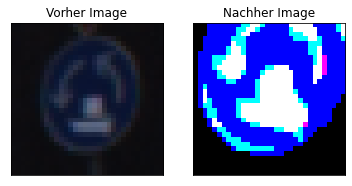

In [ ]:
example_traffic_sign = X_train[np.random.randint(0, len(X_train) - 1)]

plt.figure(1, figsize = (6 , 3))

# Originalbild 
plt.subplot(1 , 2 , 1)   # das sagt in Zeile 1 2 Bilder und jetzt wird das erste geplottet
img = example_traffic_sign
plt.imshow(img)
plt.title('Vorher Image')
plt.xticks([]) , plt.yticks([])

# Bild nachher 
plt.subplot(1 , 2 , 2) # das sagt in Zeile 1 2 Bilder und jetzt wird das zweite geplottet
modified_img = example_traffic_sign
plt.imshow(train_datagen.random_transform(modified_img))
plt.title('Nachher Image')
plt.xticks([]) , plt.yticks([])

In [ ]:
# Nachfolgender Code abgewandelt aus: https://colab.research.google.com/github/CleanPegasus/Traffic-Sign-Classifier/blob/master/Traffic_Sign_Classifier.ipynb 

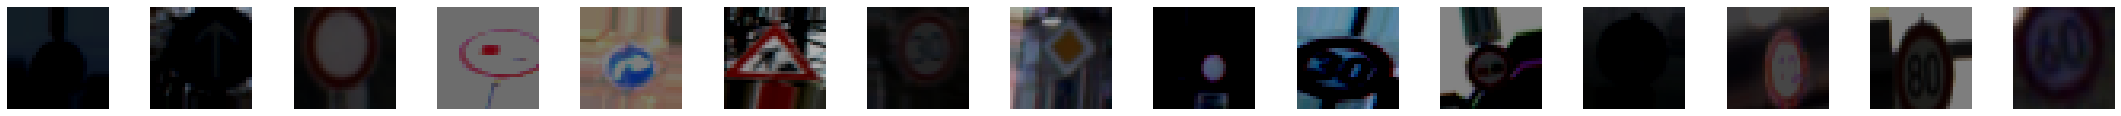

In [ ]:
batches = train_datagen.flow(X_train, y_train, batch_size = 128) # Batch size = Die Batch Size definiert wie viele Bilder pro Update trainiert werden
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize = (30, 12)) # Plotten wie schon zuvor getan
fig.tight_layout()

# image demo
for i in range(15):
    axs[i].imshow(X_batch[i]) 
    axs[i].axis('off') 

Wie auf den Bildern zu erkennen ist, befinden sich in den Ausgangsdaten sowieso Bilder mit verschiedenen Lichtverhältnissen, weshalb die Brightness Range nicht nötig wäre und daher auch der Grund für die seltsame Darstellung des Kreisverkehr Bildes im Direktvergleich ist.

# Arbeitspaket 2: Neuronales Netz


**CNN**

In [ ]:
import tensorflow as tf
# Umwandeln der Labels in kategorische Variablen, sprich Abbildung der Zielklassen auf y-Variable damit Computer damit arbeiten kann.
y_train = tf.keras.utils.to_categorical(y_train, 43)
y_val = tf.keras.utils.to_categorical(y_val, 43)
y_test = tf.keras.utils.to_categorical(y_test, 43)

Ich verwende den klassischen Aufbau eines neuronalen Netzes mit einer Faltung und den klassischen Blocks (Pool1, Drop1, Flat etc.). Das Pooling nach dem Layer verstärkt den Faltungseffekt.

In [ ]:
# Quelle Malaria
import tensorflow as tf
import tensorflow.keras   # Keras als Schnittstelle zu den "komplizierteren Umfängen"
from tensorflow.keras import layers
from tensorflow.keras import Model

INPUT_SHAPE = (32, 32, 3) # Zahlen analog Input Shape aus Arbeitspaket 1
num_classes = len(traffic_sign_classes_csv.index)

inp = tf.keras.layers.Input(shape=INPUT_SHAPE)

conv1 = tf.keras.layers.Conv2D(32, 
                               kernel_size=(3, 3), # 5 & 3 sind gängige choices. Sie spezifiziert die Höhe und Weite des 2D Conv. windows und erhöht die Parameter Anzahl
                               activation='relu',
                               padding='same')(inp)


pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1) # Das Pooling verwirft überflüssige Informationen und reduziert die Datenmenge (3D zu 2D)

drop1 = tf.keras.layers.Dropout(0.3) (pool1)

flat = tf.keras.layers.Flatten()(drop1)

hidden1 = tf.keras.layers.Dense(32, activation='relu')(flat)

drop2 = tf.keras.layers.Dropout(rate=0.3)(hidden1)

out = tf.keras.layers.Dense(num_classes, activation='softmax')(drop2)



model_CNN1 = tf.keras.Model(inputs=inp, outputs=out)
model_CNN1.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 flatten_10 (Flatten)        (None, 8192)              0         
                                                                 
 dense_19 (Dense)            (None, 32)                262176    
                                                          

In [ ]:
# Quelle Kernal Size: https://medium.com/analytics-vidhya/significance-of-kernel-size-200d769aecb1

Quelle zur Wahl der Aktivierungsfunktion **Softmax** statt wie bei Malaria Sigmoid: [Aktivierungsfunktionen: Sigmoid-, ReLU-, Leaky ReLU- und Softmax-Grundlagen für neuronale Netze und Deep Learning](https://ichi.pro/de/aktivierungsfunktionen-sigmoid-relu-leaky-relu-und-softmax-grundlagen-fur-neuronale-netze-und-deep-learning-155703049115934) . Die Sigmoidfunktion ist einfach und trägt dazu bei die Zeit bei der Erstellung von Modellen zu minimieren. Softmax (wie bei Malaria Beispiel verwendet) kümmert sich hingegen um die Wahrscheinlichkeitsverteilung.


Jetzt experimentiere ich noch mit Epochen. Diese beschreiben, wie viele Durchläufe durch das gesamte Datenset gemacht werden (siehe Malaria Beispiel). Das Ergebnis kann durch diesen Parameter deutlich verbessert werden. Allerdings Achtung bei zu vielen Durchläufen: Je mehr Epochen, desto mehr Training, desto besser passen die Trainingsdaten. Dies führt gelegentlich zu Overfitting.


In [ ]:
# Hier abgebildet der zweite Durchlauf nach Anpassung Image Augmentation
# Ergebnis der ersten Runde oben bei Image Augmentation vermerkt

opt = tf.keras.optimizers.Adam(learning_rate=0.005) # Adam, da wenig Speicherbedarf & unveränderlich ggü. diagonaler Neuskalierung von Gradienten 

 # Als Loss-Funktion Categorical_cross_entropy 

model_CNN1.compile(loss='categorical_crossentropy', # Wichtig: Nicht binary, da konträr zu Malaria multi-class classification und nicht zweiteilig erforderlich
              optimizer=opt, 
              metrics=['accuracy'])

history_CNN1 = model_CNN1.fit(train_datagen.flow(X_train, y_train, batch_size = 128),
                                    epochs = 5, 
                                    validation_data = (X_val, y_val),
                                    shuffle = 1)

earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=0, mode='min')

Epoch 1/5
272/272 [==============================] - 39s 143ms/step - loss: 3.0783 - accuracy: 0.1610 - val_loss: 112.5127 - val_accuracy: 0.2245
Epoch 2/5
272/272 [==============================] - 39s 142ms/step - loss: 2.6131 - accuracy: 0.2487 - val_loss: 141.4964 - val_accuracy: 0.2950
Epoch 3/5
272/272 [==============================] - 38s 140ms/step - loss: 2.4765 - accuracy: 0.2771 - val_loss: 157.7673 - val_accuracy: 0.3277
Epoch 4/5
272/272 [==============================] - 38s 139ms/step - loss: 2.4307 - accuracy: 0.2852 - val_loss: 156.1512 - val_accuracy: 0.2993
Epoch 5/5
272/272 [==============================] - 38s 140ms/step - loss: 2.3984 - accuracy: 0.2896 - val_loss: 122.9047 - val_accuracy: 0.3177


[Accuracy vs. Validation Accuracy](https://stackoverflow.com/questions/51344839/what-is-the-difference-between-the-terms-accuracy-and-validation-accuracy)


Accuracy bezieht sich auf den Trainingsdatensatz, Validation Accuracy beschreibt die Genauigkeit, von der man ausgeht, dass das Model mit arbeitet, wenn neue Datensätze zugeführt werden. Daher ist es wichtiger, dass die Validation Accuracy gut ist - bzw. wäre es schlimmer, wenn die Trainnigs Accuracy gut aber die Validation Accuracy schlecht wäre. Aktuell kann man in dem Verlauf der Epochen beobachten, dass das Modell von Epoche zu Epoche im Loss runter geht. Dies bedeutet, dass das Modell nicht "übertrieben" an die Trainingsdaten angepasst wird und seine Fähigkeit zur Vorhersage neuer Daten behält. 

In [ ]:
# Plot 1. Durchlauf (Quelle der Plots: Malaria)

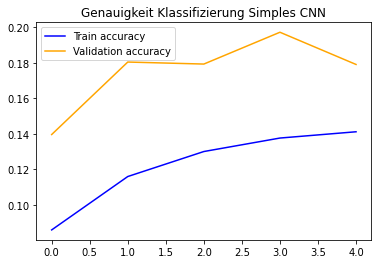

In [ ]:
plt.title('Genauigkeit Klassifizierung Simples CNN')
plt.plot(history_CNN1.history['accuracy'], color='blue', label='Train accuracy')
plt.plot(history_CNN1.history['val_accuracy'], color='orange', label='Validation accuracy')
plt.legend()
plt.show()

In [ ]:
# Plot 2. Durchlauf nach Image Augmentation Veränderung

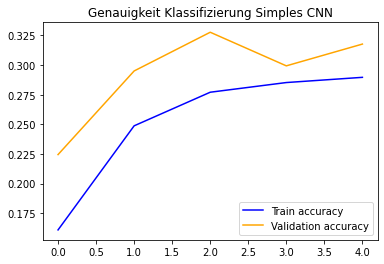

In [ ]:
plt.title('Genauigkeit Klassifizierung Simples CNN')
plt.plot(history_CNN1.history['accuracy'], color='blue', label='Train accuracy')
plt.plot(history_CNN1.history['val_accuracy'], color='orange', label='Validation accuracy')
plt.legend()
plt.show()

In [ ]:
model_CNN1.save('basic_cnn1.h5')

Für ein optimaleres Ergebnis muss das neuronale Netz noch trainiert werden. Für ein besseres Ergebnis verändere ich einige der Parameter:

*   Verändern des Dropout auf 0.6 (Die Wahl fällt auf 0,6, da ein guter Wert für das Dropout zwischen 0,5 und 0,8 liegt. Durch die Regulierung des Parameters (Ausgleich) und eine Ausschaltung 60% der Neuronen im Layer erhoffe ich mir eine Verbesserung des Ergebnisses. Andere Neuronen mit weniger starken Input bekommen durch das Ausschalten mehr Gewicht. Overfitting kann bei CNNs zu einem Problem werden. Mit Hilfe des Dropouts kann diesem entgegen gewirkt werden. Quelle: [Neuronale Netze](https://user.phil.hhu.de/~petersen/SoSe17_Teamprojekt/AR/neuronalenetze.html)
*   Einbauen neuer ConvLayers (Die Wahl fällt rein zufällig aus Interesse auf 5 Layer und ist auf keine tiefere Begründung zurückzuführen). Mit jedem zusätzlichen Layer entstehen Faltungen, durch welche man immer mehr Merkmale und Konturen erkennen kann. Die Faltungsschichten sind die wichtigsten Bausteine, die in einem neuronalen Netz verwendet werden. Das Ergebnis sind hochspezifische Merkmale, die überall auf den Eingabebildern erkannt werden können. Quelle: [How Do Convolutional Layers Work in Deep Learning Neural Networks?](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)
*  Erhöhung der Batch Size von 128 auf 256. Die Batchgröße definiert die Anzahl der Proben, die durch das Netzwerk verbreitet werden. (Wenn die Batch Size kleiner als die Samples ist, wird die Schätzung des Gradienten ungenauer).
* Anpassung der Lernrate auf 0,001. Nachdem die Batch Size abgearbeitet wird, werden die Gewichte um die Schrittweise der Lernrate aktualisiert. Geringe Batch Size heißt auch kleine Lernrate, sonst kommt es eventuell zu einem Overshoot. Wichtig ist es einen Trade-off zwischen Genauigkeit und Aufwand zu finden.

Ich **verändere** (im Vergleich zu der ausgänglichen Netzstruktur) den **Aufbau des Netzes** und damit hoffentlich auch die **Datenqualität**. Ich lasse einen Layer ohne Pooling laufen. Der Faltungseffekt wird also erst nach dem zweiten Layer verstärkt. Außerdem füge ich schon ab dem  dritten Layer ein Dropout ein, um manche Neuronen mit zu starkem Input und damit auch potentiellen Einfluss auf die Genauigkeit früh zu vermeiden. Damit sollte das Modell gut generalisieren. Inspiration für den neuen Aufbau:

[Traffic Sign Classifier](https://colab.research.google.com/github/CleanPegasus/Traffic-Sign-Classifier/blob/master/Traffic_Sign_Classifier.ipynb).

Außerdem kann man diese Art von Aufbau (Mehrere Layer hintereinander ohne Pooling) auch oft bei der Summary von Transfer Learning Modellen erkennen.

In [ ]:
# Quelle Malaria mit Aufbau Inspiration von Summaries von Transfer Learning Modellen

INPUT_SHAPE = (32, 32, 3) # Zahlen analog Input Shape aus Arbeitspaket 1
num_classes = len(traffic_sign_classes_csv.index)

inp = tf.keras.layers.Input(shape=INPUT_SHAPE)

conv1 = tf.keras.layers.Conv2D(32, 
                               kernel_size=(5, 5), # 3,3, da 3 Channels vorhanden. Sie spezifiziert die Höhe und Weite des 2D Conv. windows
                               activation='relu',
                               padding='same')(inp)

conv2 = tf.keras.layers.Conv2D(64, 
                               kernel_size=(3, 3), 
                               activation='relu',
                               padding='same') (conv1)

pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2) # Das Pooling verwirft überflüssige Informationen und reduziert die Datenmenge


conv3 = tf.keras.layers.Conv2D(64, 
                               kernel_size=(3, 3), 
                               activation='relu',
                               padding='same') (pool1)

drop1 = tf.keras.layers.Dropout(0.6) (conv3)


conv4 = tf.keras.layers.Conv2D(64, 
                               kernel_size=(3, 3), 
                               activation='relu',
                               padding='same') (drop1)

drop2 = tf.keras.layers.Dropout(0.6) (conv4)

conv5 = tf.keras.layers.Conv2D(64, 
                               kernel_size=(3, 3), 
                               activation='relu',
                               padding='same') (drop2)

pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv5) 

drop3 = tf.keras.layers.Dropout(0.6) (pool2)

flat = tf.keras.layers.Flatten()(drop3)

hidden1 = tf.keras.layers.Dense(512, activation='relu')(flat)
drop4 = tf.keras.layers.Dropout(0.6) (hidden1)

out = tf.keras.layers.Dense(num_classes, activation='softmax')(drop4)



model_CNN2 = tf.keras.Model(inputs=inp, outputs=out)
model_CNN2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 64)        0         
                                                           

In [ ]:
# die Parameter erhöhen sich durch die zusätzlichen ConvLayer deutlich

**Nicht ausführen, nur Erklärung!** Wichtig ist es allerdings bei dem herumspielen mit dem Aufbau des neuronalen Netzes nicht das Flatten nach vorne zu ziehen, da dies das Netz auf 1-dimensional reduziert. Danach ist der weitere Aufbau unbrauchbar. Dies fand ich im Verlauf des experimentieren heraus. Beispiel siehe unten: 

In [ ]:
# INPUT_SHAPE = (32, 32, 3) # Zahlen analog Input Shape aus Arbeitspaket 1
# num_classes = len(traffic_sign_classes_csv.index)

# inp = tf.keras.layers.Input(shape=INPUT_SHAPE)

# conv1 = tf.keras.layers.Conv2D(32, 
                               # kernel_size=(5, 5), # 3,3, da 3 Channels vorhanden. Sie spezifiziert die Höhe und Weite des 2D Conv. windows
                               # activation='relu',
                               # padding='same')(inp)


# flat = tf.keras.layers.Flatten()(conv1) --> Problem!
# drop1 = tf.keras.layers.Dropout(0.5) (flat)

# conv2 = tf.keras.layers.Conv2D(64, 
                               # kernel_size=(3, 3), 
                               # activation='relu',
                               # padding='same') (conv2)

# drop2 = tf.keras.layers.Dropout(0.5) (conv2)

# conv3 = tf.keras.layers.Conv2D(64, 
                              # kernel_size=(3, 3), 
                              # activation='relu',
                              # padding='same') (drop2)

# drop3 = tf.keras.layers.Dropout(0.5) (conv3)

# pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(drop3) # das Pooling verwirft überflüssige Informationen und reduziert die Datenmenge

# conv4 = tf.keras.layers.Conv2D(64, 
                               # kernel_size=(3, 3), 
                               # activation='relu',
                               # padding='same') (pool1)

# drop4 = tf.keras.layers.Dropout(0.5) (conv4)

# conv5 = tf.keras.layers.Conv2D(64, 
                               # kernel_size=(3, 3), 
                               # activation='relu',
                               # padding='same') (drop4)

# pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv5) # das Pooling verwirft überflüssige Informationen und reduziert die Datenmenge

# drop5 = tf.keras.layers.Dropout(0.5) (pool2)

# hidden1 = tf.keras.layers.Dense(512, activation='relu')(drop5)

# out = tf.keras.layers.Dense(num_classes, activation='softmax')(hidden1)



# model_CNN2 = tf.keras.Model(inputs=inp, outputs=out)
# model_CNN2.summary()

Gerade am Anfang wollen wir möglichst häufig prüfen wie gut wir sind, um dann anzupassen. Wenn die Batch Size zu hoch ist, wird erst zu spät angepasst, wenn die Batch Size zu klein ist, ist der Aufwand ineffizient. Bei 34.000 Bildern ist eine Batch Size von 256 zu empfehlen. (34.000/256=133 Stapel). Diese These bestätigte auch das herum experimentieren mit den Epochen.

In [ ]:
# Aus Erfahrung habe ich festgestellt, dass mit 30 Epochen das beste Ergebnis erreicht wird
# Ergebnis 30 Epochen: 97% Val. Accuracy und 66% Train. Accuracy BZ 256

Compile and train the model (Quelle: Malaria, leicht verändert)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model_CNN2.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])

history_CNN2 = model_CNN2.fit(train_datagen.flow(X_train, y_train, batch_size = 256), 
                                    epochs = 30, 
                                    validation_data = (X_val/255, y_val)) # NORMALISIEREN
                                    # shuffle = 1) # Bringt michts

Epoch 1/30
136/136 [==============================] - 40s 223ms/step - loss: 3.4373 - accuracy: 0.0766 - val_loss: 3.1898 - val_accuracy: 0.1379
Epoch 2/30
136/136 [==============================] - 30s 218ms/step - loss: 3.0178 - accuracy: 0.1587 - val_loss: 2.2834 - val_accuracy: 0.3467
Epoch 3/30
136/136 [==============================] - 30s 220ms/step - loss: 2.5621 - accuracy: 0.2608 - val_loss: 1.9083 - val_accuracy: 0.3701
Epoch 4/30
136/136 [==============================] - 30s 218ms/step - loss: 2.3074 - accuracy: 0.3156 - val_loss: 1.6332 - val_accuracy: 0.4456
Epoch 5/30
136/136 [==============================] - 33s 241ms/step - loss: 2.1484 - accuracy: 0.3527 - val_loss: 1.3728 - val_accuracy: 0.5472
Epoch 6/30
136/136 [==============================] - 29s 216ms/step - loss: 2.0144 - accuracy: 0.3923 - val_loss: 1.2196 - val_accuracy: 0.5893
Epoch 7/30
136/136 [==============================] - 29s 216ms/step - loss: 1.9187 - accuracy: 0.4216 - val_loss: 1.0781 - val_ac

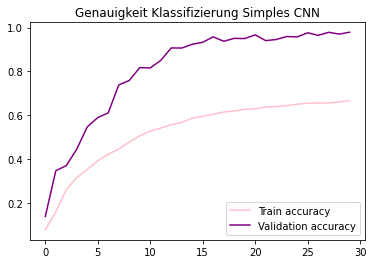

In [ ]:
# Plotte Genauigkeit 30 Epochen
plt.title('Genauigkeit Klassifizierung Simples CNN')
plt.plot(history_CNN2.history['accuracy'], color='pink', label='Train accuracy')
plt.plot(history_CNN2.history['val_accuracy'], color='purple', label='Validation accuracy')
plt.legend()
plt.show()

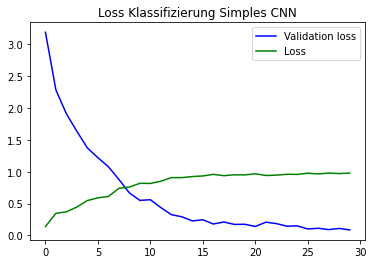

In [ ]:
plt.title('Loss Klassifizierung Simples CNN')
plt.plot(history_CNN2.history['val_loss'], color='blue', label='Validation loss')
plt.plot(history_CNN2.history['val_accuracy'], color='green', label='Loss')
plt.legend()
plt.show()

**Outcome:** Meine Anpassungen am Neuronalen Netz durch das Einfügen neuer Layer mit veränderter Netzstruktur sowie der Veränderung weiterer Hyper Parameter (Image Augmentation, Dropout, Lernrate & Batch Size), haben gezeigt, dass die Genauigkeit um **80% (Ausgang 17%)** gesteigert werden konnte. Die Genauigkeit im Modell beträgt folglich: **97%**. Die Validierungsgenauigkeit ist extrem hoch, was für das Modell spricht, da diese schwieriger zu erreichen ist.

In [ ]:
model_CNN2.save('basic_cnn2.h5') # Mit diesem Code ist das Speichern des Modells (bei Bedarf) in einer H5 Datei möglich

# Arbeitspaket 3: Transfer Learning

**DenseNet169**

In diesem Arbeitspaket werde ich die Deep Learning Methode Transfer Learning anwenden. Transfer Learning zielt darauf ab, alle Elemente des vortrainierten Modells bis auf die letzten Schichten direkt zu übernehmen. Ich wähle das folgende Modell, welches spezifische Charakteristika aufweist:

**Model: DenseNet169**

Top-1 Accuracy: 0.762

Top-5 Accuracy: 0.932

Parameter: 14,307,880

Tiefe: 169

DenseNet ist ein Modell, welches auch mit dem kleinen Format der Bilder umgehen kann. DenseNet (Dense Convolutional Network) hat mehrere Vorteile: Durch das Modell wird beispielsweise die Merkmalsausbreitung verstärkt und die Wiederverwendung von Merkmalen gefördert. Des Weiteren kann die Anzahl der Parameter erheblich reduziert werden. Quelle inhaltliche Untermauerung: [Transfer learning using Keras with DenseNet-169](https://medium.com/@carlosz22/transfer-learning-using-keras-with-densenet-169-91679300f94a) und [DenseNet-169](https://www.kaggle.com/pytorch/densenet169). 
Noch einmal spezifisch ausgedrückt: Ich habe DenseNet-169 gewählt, weil es im Vergleich zu anderen Modellen wie z. B. VGG, ResNet, InceptionV oder auch MobileNet, relativ niedrige Parameter aufweist sowie die spezfische Architektur des Modells das Problem des verschwindenden Gradienten relativ einfach und gut bewältigen kann.

In [ ]:
# Jetzt setze ich das Modell ein
# Instanziieren der Densenet169-Architektur mit Image Augmentation
# Um die niedrige Top-1 Accurancy des Modells zu verbessern 

In [ ]:
train_datagen_TF = ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.5,
    shear_range = 0.08,
    rescale=1./255, # normalisieren des Bildes auf 255 Farben --> Wichtig
    rotation_range = 10,
    horizontal_flip=False,
    vertical_flip=False)

train_datagen_TF.fit(X_train)

DenseNet orientiert sich mit Inhalten und übergreifenden Informationen an [DenseNet](https://keras.io/api/applications/densenet/) & [Transfer Learning & fine-tuning - Build a Model](https://colab.research.google.com/github/keras-team/keras-io/blob/master/guides/ipynb/transfer_learning.ipynb#scrollTo=0YTU3pwFEspq)

**Ich baue einen Dropout = 0,6 als Hyperparameter sowie einen zusätzlichen Layer in das vortrainierte Modell ein**

In [ ]:
num_classes = len(traffic_sign_classes_csv.index)

def model_TFL():
  baseModel = tf.keras.applications.DenseNet169( # Schaffung Basis Modell
  include_top=False,
  weights="imagenet",
  input_shape=(32, 32, 3))

  base_out = baseModel.output # !Plus 1 Layer um Accuracy zu erhöhen!
  flatten = tf.keras.layers.Flatten()(base_out)
  drop1 = tf.keras.layers.Dropout(0.6) (flatten) # !Einbau eines Dropouts!
    
  out = tf.keras.layers.Dense(num_classes, activation='softmax')(drop1) # Müssen auch hier Aktivierungsfunktion auf Klassen anpassen

  TransferModel = tf.keras.Model(inputs=baseModel.input, outputs=out)  

  TransferModel.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), # Compile () ist relevant für den Freeze Vorgang, Optimizer Adam wie zuvor erklärt
                      loss='categorical_crossentropy', # Analog CNN
                      metrics=['accuracy'])

  return TransferModel

Danach friere ich dann das Basismodell ein, bevor ich ein neues Modell/Layer on top kreiere. Ich unfreeze den neuen Layer und trainieren das gesamte Modell mit einer geringen Lernrate.

In [ ]:
model_TFL = model_TFL()

for layer in model_TFL.layers:
    layer.trainable = False # "Freezing the Layer" --> Layer wird während Training nicht aktualisiert

for layer in model_TFL.layers[-1:]:
    layer.trainable = True # Freeze gilt für alle Layer, daher neuen Layer als trainierbar klassifizieren

print("Total Layers:", len(model_TFL.layers)) # Befehl drucken wie schon zuvor öfter angewandt
print("Total trainable layers:", sum([1 for l in model_TFL.layers if l.trainable]))

print(model_TFL.summary()) # Summary printen. Analog zu vorhergigen aufgezeigten "print" Vorgängen

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Total Layers: 598
Total trainable layers: 1
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d_12 (ZeroPadding  (None, 38, 38, 3)   0           ['input_7[0][0]']                
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 16, 16, 64)   9408        ['zero_padding2d_12[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 16, 16, 6

Die Summary zeigt uns den gewollten Layer, den wir als trainierbar gesetzt haben und, dass die vortrainierten Gewichte eingeladen sind.

Jetzt experimentiere ich analog zu CNN mit Epochen, um das Modell auf das Dataset zu trainieren. Das Ergebnis kann durch diesen Parameter deutlich verbessert werden. Alternativ könnte man auch die Merkmalsextraktion verwenden. Ein Vorteil davon ist, dass das Basismodell nur einmal für die Daten ausgeführt werden muss und nicht einmal pro Trainingsepoche. Allerdings habe ich den etwas längeren Ansatz gewählt, da man die Eingabedaten des neuen Modells während des Trainings nicht dynamisch ändern kann, was beispielsweise bei der Image Augmentation, die ich zu Beginn durchgeführt habe, erforderlich ist. Da das Trainingsset relativ klein ist, ist Data Augmentation hier notwendig.

In [ ]:
# Ich starte dieses Mal statt 10 mit 15 Epochen, um das Training zu erhöhen. Dies sollte hoffentlich der Top-1 Accuracy gut tun
# die Batch Size liegt bei 256
# Ergebnis 15 Eochen: 93% Val. Accuracy, 99% Accuracy
# Quelle: Malaria mit anderem Aufbau, da u.a compile schon in das Modell gesetzt wurde und nicht noch einnmal nötig ist

In [ ]:
history_model_TFL = model_TFL.fit(train_datagen_TF.flow(X_train, y_train, batch_size = 256),
                                epochs = 15, 
                                validation_data = (X_val/255, y_val)) # Normalisierung auch bei Transfer Learning

Epoch 1/15
136/136 [==============================] - 30s 218ms/step - loss: 0.0376 - accuracy: 0.9901 - val_loss: 0.1834 - val_accuracy: 0.9562
Epoch 2/15
136/136 [==============================] - 28s 208ms/step - loss: 0.0343 - accuracy: 0.9906 - val_loss: 0.3018 - val_accuracy: 0.9417
Epoch 3/15
136/136 [==============================] - 30s 219ms/step - loss: 0.0411 - accuracy: 0.9885 - val_loss: 0.2807 - val_accuracy: 0.9444
Epoch 4/15
136/136 [==============================] - 38s 278ms/step - loss: 0.0354 - accuracy: 0.9903 - val_loss: 0.1681 - val_accuracy: 0.9590
Epoch 5/15
136/136 [==============================] - 28s 209ms/step - loss: 0.0311 - accuracy: 0.9912 - val_loss: 0.3434 - val_accuracy: 0.9156
Epoch 6/15
136/136 [==============================] - 28s 209ms/step - loss: 0.0279 - accuracy: 0.9919 - val_loss: 0.2830 - val_accuracy: 0.9476
Epoch 7/15
136/136 [==============================] - 29s 210ms/step - loss: 0.0275 - accuracy: 0.9921 - val_loss: 0.4009 - val_ac

In [ ]:
# Plotten der Trainings und Validations Accuracy für  Transfer Learning analog Vorgehen CNN 

Text(0.5, 1.0, 'Transfer Learning - Trainings- und Validation Accuracy')

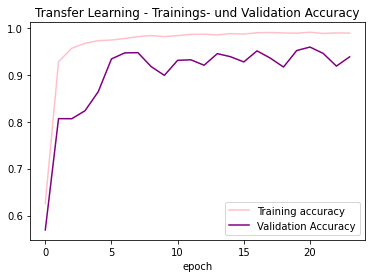

In [ ]:
plt.plot(history_model_TFL.history['accuracy'], color='pink', label='Train accuracy') # 15 Epochen
plt.xlabel('epoch')
plt.plot(history_model_TFL.history['val_accuracy'], color='purple', label='Validation accuracy')
plt.legend(['Training accuracy', 'Validation Accuracy'])
plt.title('Transfer Learning - Trainings- und Validation Accuracy')

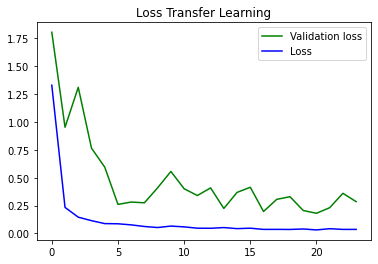

In [ ]:
# Plotte Validation Loss
plt.title('Loss Transfer Learning')
plt.plot(history_model_TFL.history['val_loss'], color='green', label='Validation loss')
plt.plot(history_model_TFL.history['loss'], color='blue', label='Loss')
plt.legend()
plt.show()

In [ ]:
# Plot der Attribute im direkten Vergleich, Quelle: 

(0.0, 1.8)

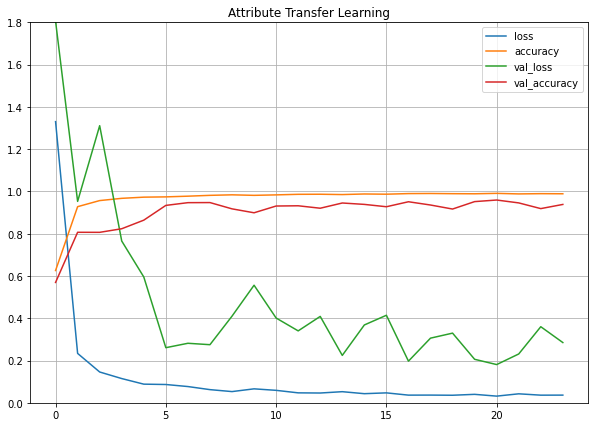

In [ ]:
# Quelle: https://medium.com/@lawrence.may/using-tensorflow-for-classification-on-the-gtsrb-german-traffic-sign-dataset-d71e5557a015
pd.DataFrame(history_model_TFL.history).plot(figsize=(10, 7))
plt.title('Attribute Transfer Learning')
plt.grid(True)
plt.gca().set_ylim(0, 1.8)

In [ ]:
TF_Model.save('TF_Model.h5') # Mit diesem Code ist das Speichern des Modells (bei Bedarf) in einer H5 Datei möglich

**Outcome**
Das Modell kann final eine Genauigkeit von 93% Val. & 99% Test Accuracy erzielen. Dabei fluktuiert die Validierungsgenauigkeit wie auch bei CNN im Vergleich etwas stärker als die Trainingsgenauigkeit, was an sich nicht ganz ungewöhnlich ist, da die Validierung der Verkehrsschilder etwas schwieriger als das Trainieren von Daten ist. (Vergleich Führerschein Prüfung aus der Vorlesung). Nichtsdestotrotz liegen hier beide Werte über 90%, was auf den ersten Blick für das Modell spricht, allerdings in einem Realvergleich noch bestätigt werden muss.

# Arbeitspaket 4: Modell Güte 

**Realvergleich**

Wie funktioniert jetzt der Einsatz des Modells aber? Bei einem realen Einsatz würde das Modell ein neues Straßenschild erkennen müssen.
Am besten testet man das Modell, in dem es Test Daten bekommt, die es vorher noch nicht gesehen hat. Das Modell erhält dann ein Bild als Input und berechnet eine prozentuale Zahl, die später auch ausdrückt, zu welcher der Zielklassen das Bild gehört. Allerdings ist es wichtig keine falschen Trainingsdaten zu nehmen, da diese die Modellgüte von KI Anwendungen verzerren. Es ist empfehlenswert saubere Daten zur Bewertung von Modellen einzusetzen. Quelle inhaltliche Aussage: [Falsche Trainingsdaten verzerren Güte-Einschätzung von KI-Modellen](https://www.heise.de/hintergrund/Falsche-Trainingsdaten-verzerren-Guete-Einschaetzung-von-KI-Modellen-6010496.html)

In [ ]:
# Quelle Malaria abgeändert auf Multiklassenproblem
# Ich zeige in einem Bewertungsschritt, um die Genauigkeit unseres Modells zu überprüfen, nochmal den Score für CNN auf
# dafür verwende ich den schon öfter verwendeten Befehl print 

In [ ]:
score = model_CNN2.evaluate(X_test/255, y_test, verbose = 1)
print('Test Score', score[0])
print('Test Accuracy', score[1])

395/395 [==============================] - 2s 4ms/step - loss: 0.1092 - accuracy: 0.9747
Test Score 0.10916071385145187
Test Accuracy 0.974663496017456


Ergebnis Bewertung CNN: 97%

In [ ]:
# Ich zeige nochmal den Score für das Transfer Learning Modell auf

In [ ]:
score = model_TFL.evaluate(X_test/255, y_test, verbose = 1)
print('Test Score', score[0])
print('Test Accuracy', score[1])

395/395 [==============================] - 12s 31ms/step - loss: 0.3445 - accuracy: 0.9315
Test Score 0.34447717666625977
Test Accuracy 0.9315122961997986


Ergebnis Bewertung Transfer Learning: 93%

Quelle zu der obigen Modell Anwendung: Malaria Notebook - zu Beginn verlinkt

Als nächstes möchte ich das Modell unter realen Bedingungen testen. Wie eingänglich beschrieben, bekommt das Modell daher Testdaten, die es zuvor noch nicht gesehen hat. Hier kann man theoretisch jedes Bild eines Verkehrsschildes nehmen. Der Einfachheit her geschuldet entnehme ich das Test Bild von Alamy. Alamy ist dafür bekannt hochwertige und lizenzfreie Bilder zur Verfügung zu stellen. Alamy haben wir während des Masters auch in anderen Fächern benutzt. Ich möchte nicht das einfachste Bild wählen. Dies wäre zum Beispiel ein 50 km/h Schild, da dies sehr charakteristisch, leicht erkennbar und noch dazu extrem häufig in der Trainingsmenge vertreten ist. 

Ich wähle das folgende Richtungs-Bild, dessen URL ich aus dem Quelltext der Seite entnomen habe:


In [ ]:
# mit dem folgenden Befehl lese ich die Bilddaten einer URL in Python ein. Dafür muss ich 4 Zeilen in meine Standardbibliothek importieren

(1300, 951)


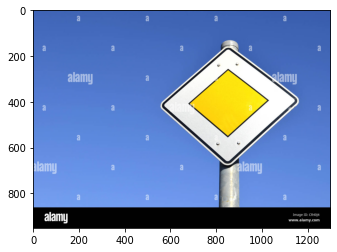

In [ ]:
from keras.preprocessing import image
from PIL import Image
from urllib import request
from io import BytesIO

url = "https://c7.alamy.com/compde/cr40j4/rechts-des-weges-verkehr-schilder-deutschland-europa-cr40j4.jpg" 
res = request.urlopen(url).read() # res steht für result

Sample_Image = Image.open(BytesIO(res))
plt.imshow(Sample_Image) 
print(Sample_Image.size)

Oben zu sehen ist das Originalbild. Der Code dafür stammt aus der folgenden Quelle: [What's the fastest way to read images from urls?](https://stackoverflow.com/questions/55821612/whats-the-fastest-way-to-read-images-from-urls) Über Stackoverflow können Software Entwickler Fragen stellen und über eine Art Forum beantwortet bekommen. Hieraus kann man sich bei Fragen oft nützliche Tipps holen. Zum Verständnis trug auch diese Quelle [How to build a powerful image classifier with few images](https://datauab.github.io/catsvsdogs/) bei.

Unser Modell ist auf 32x32 Pixel trainiert (In Arbeitspaket 1 beschrieben), daher müssen wir das ausgewählte Bild auf diese Größe anpassen. [Image Processing in Python](https://auth0.com/blog/image-processing-in-python-with-pillow/)

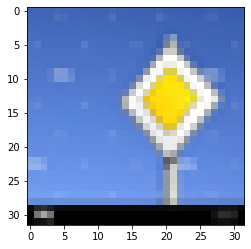

In [ ]:
reduced_Sample_Image = Image.open(BytesIO(res)).resize((32,32)) # resize
plt.imshow(reduced_Sample_Image) 

In [ ]:
# Der erste Schritt ist getan, jetzt bereite ich das Bild für das Modell auf
# Umwandeln des Bildes in ein Numpy-Array mit Struktur
# Erwartet wird folgende Struktur vom Model: (batch_size = 1 Bild, Höhe, Breite, Kanäle = RGB), deshalb wird eine Dimension hinzugefügt
# Bild normalisieren
# https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0 (Predicting the class of unseen images) oder Malaria

In [ ]:
img_tensor = image.img_to_array(reduced_Sample_Image)   
img_tensor = np.expand_dims(img_tensor, axis=0) # Dimension hinzufügen   
img_tensor /= 255.                             

CNN Modell

In [ ]:
# Ich verwende schließlich das trainierte Modell, um eine Vorhersage über ein einzelnes Bild zu treffen
# Die predicted_class ist Y und die tatsächliche Klasse ist ebenfalls Y
# Quelle: Inspiriert von https://towardsdatascience.com/how-to-predict-an-image-with-keras-ca97d9cd4817 &
# https://stackoverflow.com/questions/37512079/python-pandas-why-does-df-iloc-1-values-for-my-training-data-select-till
# https://stackoverflow.com/questions/58928357/keras-prediction-result-getting-score-use-of-argmax

In [ ]:
predictions_single = model_CNN2.predict(img_tensor)
predictions_single = np.round(predictions_single, 7) # Runden auf 7 Nachkommastellen 

print(predictions_single.shape)
print(predictions_single)

(1, 43)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Schild "Priority road" mit Wahrscheinlichkeit von 1.0 erkannt


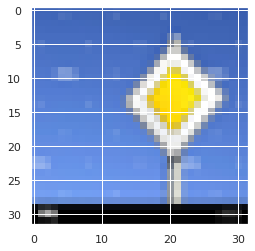

In [ ]:
predicted_class = np.argmax(predictions_single) 

predicted_class_value = np.max(predictions_single) 
name_predicted_class = traffic_sign_classes_csv.iloc[predicted_class-0].values[1] 
print("Schild \"{}\" mit Wahrscheinlichkeit von {} erkannt".format(name_predicted_class, predicted_class_value))
plt.imshow(reduced_Sample_Image) 

Quelle zur Erstellung des Rasters mit Bildern (https://medium.com/swlh/data-science-image-classification-using-deep-learning-for-self-driving-cars-52e0e5c96f2b)

In [ ]:
# True: Was im Testset als Label gespeichert ist
# Predicted: Was am Modell erkannt wurde
# Visualisierung zeigt im Direktvergleich, dass die Klassen der gespeicherten Labels mit den den erkannten Klassen des CNN2 Modells übereinstimmen 

In [ ]:
prediction = model_CNN2.predict(X_test) # Modellvorhersage sowie die wahre Beschriftung zusammen mit den Bildern anzeigen
y_true_label= y_test

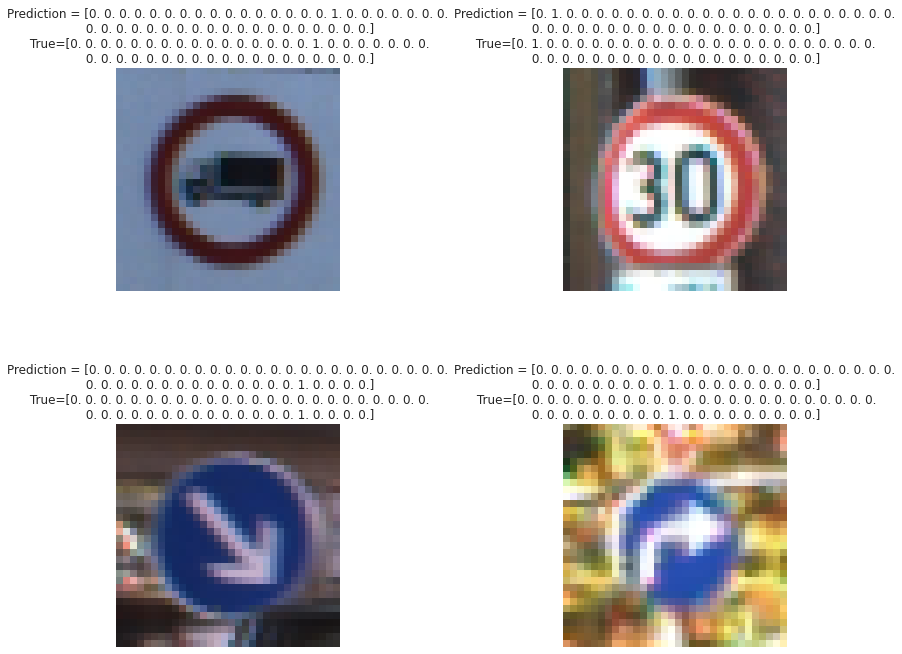

In [ ]:
L=2 # 2 mal 2 ergibt 4  Bilder mit seiner wahren Klassenbezeichnung und der vorhergesagten Klassenbezeichnung des Modells
W=2
fig , axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
for i in range(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True={}'.format(prediction[i], y_true_label[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [ ]:
# Zeige zufälliges Bild aus der Testmenge (Code Block in Zusammenarbeit mit Philipp Olbricht erstellt)

(1, 43)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Schild "Speed limit (80km/h)" mit Wahrscheinlichkeit von 1.0 erkannt


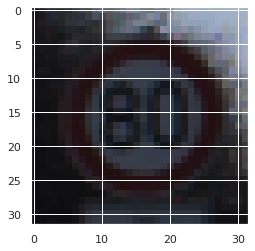

In [ ]:
Beispielbild = X_test[np.random.randint(0, len(X_test) - 1)]  
img1 = Beispielbild 
plt.imshow(img1)  

img_tensor1 = image.img_to_array(img1) 
img_tensor1 = np.expand_dims(img_tensor1, axis=0) 
img_tensor1 /=255.   

predictions_single = model_CNN2.predict(img_tensor1) 
predictions_single = np.round(predictions_single, 1)  

print(predictions_single.shape) 
print(predictions_single)  

predicted_class = np.argmax(predictions_single) 

predicted_class_value = np.max(predictions_single)
name_predicted_class = traffic_sign_classes_csv.iloc[predicted_class-0].values[1]  

print("Schild \"{}\" mit Wahrscheinlichkeit von {} erkannt".format(name_predicted_class, predicted_class_value))
plt.imshow(img1)

Transfer Learning

In [ ]:
# Analog Vorgehen und Beschreibung CNN

(1, 43)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Schild "Priority road" mit Wahrscheinlichkeit von 1.0 erkannt


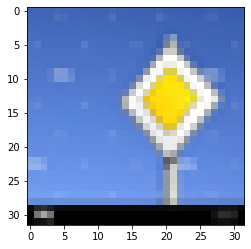

In [ ]:
predictions_single = model_TFL.predict(img_tensor)
predictions_single = np.round(predictions_single, 1) 

predicted_class = np.argmax(predictions_single) # hole den Index des höchsten Wertes

predicted_class_value = np.max(predictions_single) # hole den Index des höchsten Wertes
name_predicted_class = traffic_sign_classes_csv.iloc[predicted_class-0].values[1] # hol den Namen der Klasse mit dem höchsten Wert


print(predictions_single.shape)
print(predictions_single)
print("Schild \"{}\" mit Wahrscheinlichkeit von {} erkannt".format(name_predicted_class, predicted_class_value))
plt.imshow(reduced_Sample_Image) # Plot Bild im Zielformat

In [ ]:
prediction = model_TFL.predict(X_test) # Modellvorhersage sowie die wahre Beschriftung zusammen mit den Bildern anzeigen
y_true_label= y_test

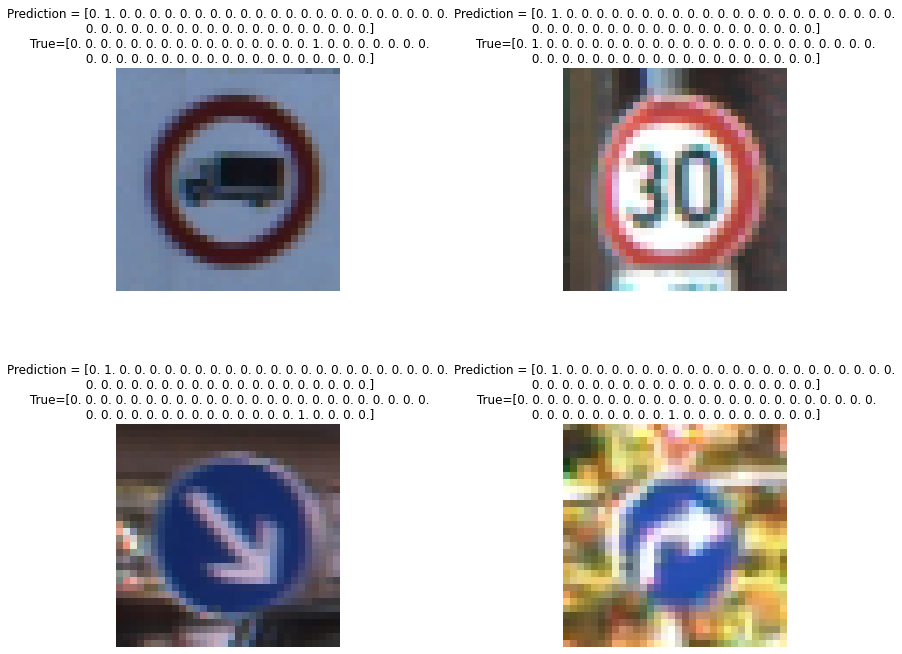

In [ ]:
L=2 # 2 mal 2 ergibt 4  Bilder mit seiner wahren Klassenbezeichnung und der vorhergesagten Klassenbezeichnung des Modells
W=2
fig , axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
for i in range(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True={}'.format(prediction[i], y_true_label[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=1)

(1, 43)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Schild "Keep right" mit Wahrscheinlichkeit von 1.0 erkannt


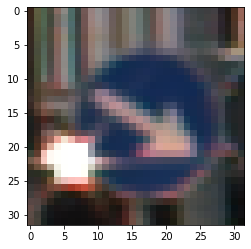

In [ ]:
Beispielbild = X_test[np.random.randint(0, len(X_test) - 1)]  
img1 = Beispielbild 
plt.imshow(img1)  

img_tensor1 = image.img_to_array(img1) 
img_tensor1 = np.expand_dims(img_tensor1, axis=0) 
img_tensor1 /=255.   

predictions_single = model_TFL.predict(img_tensor1) 
predictions_single = np.round(predictions_single, 1)  

print(predictions_single.shape) 
print(predictions_single)  

predicted_class = np.argmax(predictions_single) 

predicted_class_value = np.max(predictions_single)
name_predicted_class = traffic_sign_classes_csv.iloc[predicted_class-0].values[1]  

print("Schild \"{}\" mit Wahrscheinlichkeit von {} erkannt".format(name_predicted_class, predicted_class_value))
plt.imshow(img1)

**Outcome Gesamt:**
In den Endergebnissen ist erkennbar, dass beide meiner Modelle auch im abschließenden Realvergleich eine hohe Genaugkeit aufweisen. Sowohl CNN als auch Transfer Learning sind sich zu 100% sicher das richtige Schild zu erkennen und können dies einer genauen Zielklasse zuordnen. Des Weiteren ist zu erkennen, dass beide Modelle auch weitere Schilder treffsicher erkennen können.
Die Modelle können Verkehrszeichen also unter jeglichen Rahmenbedingungen richtig benennen.


# Arbeitspaket 5: Einsatz Verkehrszeichen für Autonomes Fahren

Ich erstelle eine **Multiklassen** Confusion Matrix, um aufzuzeigen, was das eigentliche Problem ist. Wie kann ich außerdem die Zahl meiner falsch klassifizierten Ergebnisse reduzieren? Sind vielleicht Parameter falsch gewichtet??

In [ ]:
# Quellen zu Arbeitspaket 5: Malaria Beispiel &
# https://medium.com/analytics-vidhya/cnn-german-traffic-signal-recognition-benchmarking-using-tensorflow-accuracy-80-d069b7996082#b75c
# https://github.com/lmay931/GTSRBClassification/blob/main/Tensorflow%20for%20classification%20on%20the%20GTSRB%20(German%20Traffic%20Sign)%20dataset.ipynb
# https://medium.com/@lawrence.may/using-tensorflow-for-classification-on-the-gtsrb-german-traffic-sign-dataset-d71e5557a015

In [ ]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

In [ ]:
y_test # Labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_test # zeigt Labels an

array([[[[116, 139, 174],
         [116, 137, 171],
         [118, 138, 172],
         ...,
         [ 98, 114, 143],
         [ 97, 121, 147],
         [ 85, 105, 130]],

        [[115, 142, 176],
         [115, 140, 174],
         [117, 141, 175],
         ...,
         [119, 143, 176],
         [120, 141, 173],
         [120, 139, 171]],

        [[117, 141, 174],
         [117, 142, 175],
         [114, 140, 172],
         ...,
         [120, 144, 179],
         [122, 144, 179],
         [120, 143, 177]],

        ...,

        [[117, 137, 167],
         [115, 134, 164],
         [117, 135, 164],
         ...,
         [115, 137, 169],
         [116, 136, 168],
         [118, 139, 172]],

        [[116, 136, 166],
         [114, 134, 168],
         [113, 131, 166],
         ...,
         [113, 135, 167],
         [117, 136, 165],
         [115, 139, 167]],

        [[112, 135, 167],
         [110, 134, 165],
         [119, 135, 165],
         ...,
         [115, 138, 167],
        

In [ ]:
# Erstelle Confusion Matrix für Modell mit größter Val. Accuracy (CNN)
# Drucke Confusion Matrix

In [ ]:
y_test = np.argmax(y_test, axis=1) # richtige Werte
y_pred = np.argmax(model_CNN2.predict(X_test), axis=1)

In [ ]:
print("Confusion Matrix:") # Nummer der Klassen einfügen (evtl. Medium CFM GTS)
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred)) # Print summary report
print('accuracy is ',accuracy_score(y_pred,y_test)) # Print accuracy score

Confusion Matrix:
[[ 43   0   0 ...   0   0   0]
 [ 13 695   2 ...   0   0   0]
 [  1   0 737 ...   0   0   0]
 ...
 [  0   0   0 ...  49   0   0]
 [  0   0   0 ...   0  49   0]
 [  0   0   0 ...   0   1  71]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72        60
           1       0.99      0.97      0.98       720
           2       0.97      0.98      0.98       750
           3       0.98      0.91      0.94       450
           4       0.94      0.97      0.95       660
           5       0.87      0.95      0.91       630
           6       0.92      0.71      0.80       150
           7       0.95      0.90      0.93       450
           8       0.97      0.91      0.94       450
           9       0.98      0.98      0.98       480
          10       1.00      0.98      0.99       660
          11       0.92      0.93      0.93       420
          12       1.00      0.96      0.98       690
          13       0.99      1.00

Präzision und Recall reichen im Normalfall aus, um Klassifikationsmodelle in typischen Fällen zu bewerten.

**Wichtige Kennzahlen, welche aus der Confusion Matrix abgeleitet werden:**

Wichtige Kennzahlen der Confusion Matrix wie Beispielsweise Precision, Recall, f1-score oder Support müssen nicht wie bei unserem Malaria oder auch Starbucks Beispiel aus der Vorlesung berechnet werden, sondern können durch das Drucken des Classification Reports direkt ausgelesen werden. Erkennbar ist, dass viele Bilder zu 100% richtig und der restliche Großteil mit einer hohen Genauigkeit vorhergesagt werden kann (Precision). Auch zu erkennen ist, das vor allem das 50 kmh Schild (750-mal: Support) Stop Schild (270-mal: Support) besonders oft in der Trainngsmenge vorkommt. *Sogar die schwierigsten Bilder, welche kaum in der Trainingsmenge vorkommen und zusätzich schwer zu differenzeiren sind (go straight or right 37 oder 21 Pedestrians) werden mit einer hohen Genauigkeit von 100% erkannt, was ein starkes Ergebnis ist und für das Modell spricht.

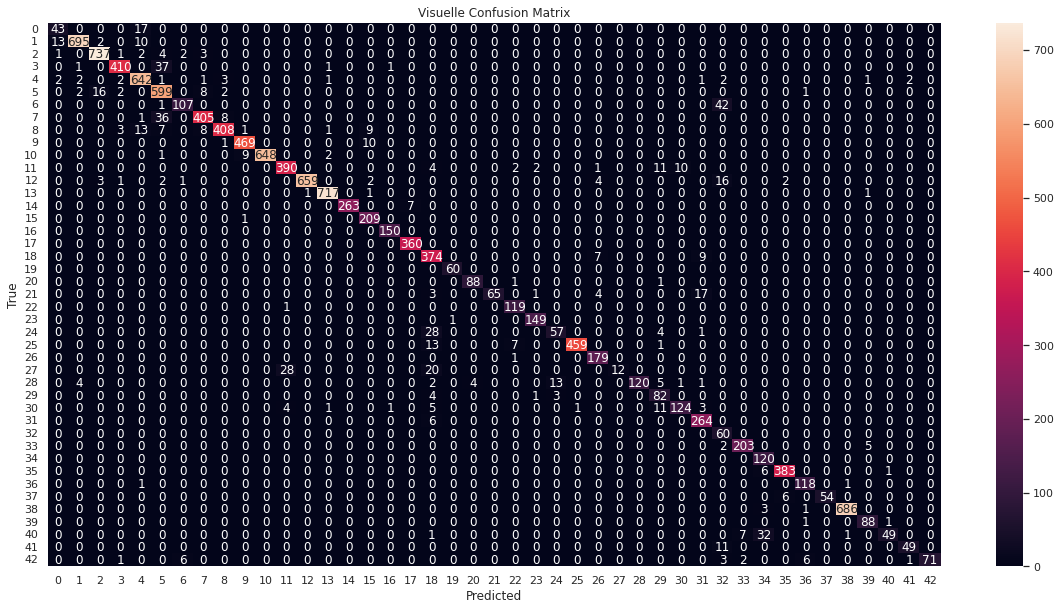

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(20,10)})
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('True'); ax.set_title('Visuelle Confusion Matrix'); 

Aus der obigen Grafik ist anhand des Schildes Vechiles over 3.5 metric tons prohibited (Nummer 16) beispielsweise herauszu lesen: 

1. Es wurden alle 150 vorhandenen Vechiles over 3.5 metric tons prohibited Schilder auch als Vechiles over 3.5 metric tons prohibited Schilder erkannt (Horizontal ausgelesen nur Nullen = Predicted).
2. 1 Schild der Klasse 30 wird als Vechiles over 3.5 metric tons prohibited erkannt. Genauso wie 1 Schild der Klasse 3 Speed limit (60km/h). (Vertikal ausgelesen = True).



In [ ]:
# Quellen Fehlerklassen:
# https://medium.com/analytics-vidhya/manipulating-class-weights-and-decision-threshold-cb7d8d9433a4
# https://medium.com/shoprunner/evaluating-classification-models-1-ff0730801f17
# https://scikit-learn.org/stable/modules/model_evaluation.html#from-binary-to-multiclass-and-multilabel
# https://towardsdatascience.com/how-to-deal-with-imbalanced-classification-without-re-balancing-the-data-8a3c02353fe3

Wichtig ist es herauszufinden, welche **Fehlerklassen** die schlimmeren Konsequenzen haben. Bei einem Klassifizierungsproblem gibt es zwei Arten von Fehlern – falsch negative und falsch positive. 

* True positive: Verkehrszeichen erkannt und auch so vorhergesagt
* True negative: Erkennung nicht vorhergesagt. Schild ist falsch.
* False positive: Erkennung vorhergesagt. Schild aber fasch.
* False negative: Schild als falsch vorhergesagt. Schild aber richtig

Wie zu erkennen ist, sind true positive oder true negative nicht optimal. Haben aber für Verkehrsteilnehmer im Vergleich zu false positive und false negative aber weniger Konsequenzen, da bei bei den beiden letzteren wirklich andere Verkerhsteilnehmer zu schaden kommen könnten. Im Laufe der Zeit, wenn die Algorithmen Verhaltensmuster lernen, wird die Baseline jeder Metrik immer genauer, was dazu führt, falsch positive und falsch negative Ergebnisse herauszufiltern. Kein Klassifizierungsmodell ist perfekt. Für die Reduktion der falsch negativen und falsch positiven Ergebnisse gibt es verschiedene Möglichkeiten, vorgeschlagen wird für das hier vorliegende Problem die Anpassung des Klassifizierungsentscheidungsschwellenwert. 

**Tiefere Ausführungen befinden sich in dem beiliegenden Projektbericht. Die Kerpunkte von class weights und treshhold sind die folgenden:**



**Class weights und treshhold**

* Im Normalfall kann davon ausgegangen werden, dass ein Verkehrsschild als solches erkannt wird, wenn eine Wahrscheinlichkeit von 50% als Grenzwert zu Grunde liegt. Dieser Grenzwert wird auch als Cutoff-Wahrscheinlichkeit bezeichnet. 

* Um die Falsch-Positiv-Rate reduzieren, kann auch ein anderer Cut-off Wert angesetzt werden. Im Optimalfall gleicht sie die die falsch positiven und falsch negativen Ergebnisse aus. 

* Die Höhe der Cut-off Wahrscheinlichkeit kann mit Hilfe des Vergleichszwischen Präzision und Recall abgewägt werden. Eine Metrik ist der Fβ-Score. Dieser gibt die Gesamtbedeutung des Recalls im Verhältnis zur Genauigkeit an. 

* Ausweitung der Metriken, da ein Multiklassenproblem vorliegt. Beim Erweitern einer binären Metrik auf Multiklassen- oder Multilabel-Probleme, werden die Daten als eine Sammlung von binären Problemen behandelt. Vorgeschlagene Metriken betreffen "weighted" sowie "samples"

Das übergreifende Ziel ist es, die Flexibilität zu erhöhen während darauf geachtet werden muss, dass Klassengewichte den Proben mit positiver Reaktion nicht zusätzliches Gewicht verleihen.


# Fazit und Herausforderung


*   Meine persönlichen Herausforderungen lagen vor allem bei der Netzstuktur des CNN Modells. Das Modell zum laufen zu bekommen, war kein Problem, allerdings hatte ich anfänglich mit starken Overfitting zu kämpfen. Meine Val. Accuracy war zwar sehr hoch, im Realvergleich konnten allerdings kaum Bilder erkannt werden. Im späteren Verlauf konnte ich dieses Problem zwar lösen, allerdings war das Verhältnis der Hyperparameter nicht optimal beziehungsweise fehlerhaft. Nach tiefgehenderen Verständnis der Zusammenhänge dieser habe ich es geschafft, ein Modell zum laufen zu bringen, welches Verkehsschilder mit einer Treffsicherheit von 100% erkennt. 
*  Außerdem machte ich den großen Fehler das Flattening in der Netzstruktur direkt hinter den ersten von mehreren Layern zu setzen, was meine weiteren Bemphungen an dem  Modell quasi nutzlos machten.
* Zu Beginn hatte ich außerdem Probleme mit der Demo zweier Bilder, welche ich durch Image Augmentation verändert hatte (Direktvergleich vorher Nachher). Bis ich herausgefunden habe, dass in den Trainingsdaten die verschiedenen Tageszeiten bereits berücksichtigt sind und die Brightness Range damit vernachlässigt werden kann. Noch dazu ist sie ein enorm emofindlicher Parameter ist. 
* Letztens bereitete mir das Ausdrucken der Confusion Marix das ein oder andere Problem, da ich in dem dazugehörigen Code eine Normalisierung hatte, welche mir nur einen eindimensionalen Array erlaubte, was natürlich nicht möglich ist. 


Die Anfertigung des Notebooks war gerade ohne ein Grundmodul, welches auf die Programmiersprache oder ähnliches abzielt, wirklich eine schwere Aufgabe. Letztendlich bin ich allerdings stolz ein funktionierendes Notebook aufzuweisen und mir so über das Semester eine für meinen späteren Lebensweg wirklich brauchbare Qualifikation angeeignet zu haben!